In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity
kickstarter = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/kickstarter-projects-201518.csv", encoding="ISO-8859-1") # use your own file on your GitHub account
kickstarter.dropna(inplace=True)
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1008941852,The return of BABY UNIVERSE!,Immersive,Theater,USD,1/1/2015,15000,12/4/2014 21:37,11880.18,failed,46,US,11880.18,11880.18,15000.00
1,1013503401,Potjie,Drama,Film & Video,GBP,1/1/2015,4500,12/2/2014 18:10,4843.00,successful,67,GB,7560.32,7477.46,6947.88
2,1020446396,Stilt City- A Bungalow Artist Space in The Roc...,Public Art,Art,USD,1/1/2015,60000,11/19/2014 23:14,18087.00,canceled,204,US,18087.00,18087.00,60000.00
3,1028008131,A 2D SideScroller RPG Made by YOU (Canceled),Video Games,Games,USD,1/1/2015,20000,12/2/2014 22:02,9.00,canceled,2,US,9.00,9.00,20000.00
4,1049544313,Balteus Belt,Apparel,Fashion,USD,1/1/2015,8000,11/18/2014 21:17,1563.00,failed,16,US,1563.00,1563.00,8000.00


In [4]:
a = np.array(kickstarter.backers)
b = np.array(kickstarter.usd_pledged_real)

dot = np.dot(a, b)  
norma = np.linalg.norm(a)  
normb = np.linalg.norm(b)  
cos1 = dot / (norma * normb)  

print(cos1)

0.7379091296625949


In [5]:
angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)

print(cos1, angle_in_radians1, degrees1)

0.7379091296625949 0.7408292825594396 42.44639123036061


In [6]:
c = np.array(kickstarter.goal)
d = np.array(kickstarter.usd_goal_real)

dot = np.dot(c, d)  
normc = np.linalg.norm(c)  
normd = np.linalg.norm(d)  
cos2 = dot / (normc * normd)  

print(cos2)

0.9369221742779534


In [7]:
angle_in_radians1 = math.acos(cos2)
degrees1 = math.degrees(angle_in_radians1)

print(cos2, angle_in_radians1, degrees1)

0.9369221742779534 0.3570779938914628 20.459062006979007


In [8]:
e = np.array(kickstarter.pledged)
f = np.array(kickstarter.ID)

dot = np.dot(e, f)  
norme = np.linalg.norm(e)  
normf = np.linalg.norm(f)  
cos3 = dot / (norme * normf)  

print(cos3)

0.08953090723194665


In [9]:
angle_in_radians1 = math.acos(cos3)
degrees1 = math.degrees(angle_in_radians1)

print(cos3, angle_in_radians1, degrees1)

0.08953090723194665 1.4811453759881053 84.8633788894359


1. Cosine similarity.     
In the above section we have compared three different attributes with each other. As we can only take numeric attributes in this I've taken backers, usd_pledged_real, goal, usd_goal_real, pledged and ID. Based on the result from cosine similarity, the connection between backers and usd_pledged_real attributes is most similar.   



In [10]:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(kickstarter.goal, kickstarter.backers).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 14534954.776060563 ,p-value: 1.0, Degrees of Freedom: 16228800


Here the p value of the attributes goal and backers is more than 0.05 so we can say that the values are independent.

In [12]:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(kickstarter.currency, kickstarter.country).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 2449785.0 ,p-value: 0.0, Degrees of Freedom: 273


2. Chi square      
In this chi square we take categorical attributes and calculate the chi square statistics P-value and also the Degrees of Freedom (dof). 
In the above section I've taken currency and country attributes to calculate the P value and its value is less than 0.05 so we can say that the both values are dependent.

3. Covariance.   
Covariance is nothing but relationship between two variables whenever one variable changes. If an increase in one variable causes a decrease in the other, that is a negative covariance, i.e. an inverse relationships, which is indicated by a negative number.

In [14]:
np.cov([kickstarter.goal],[kickstarter.backers])[0][1]

206749.619993634

In [15]:
np.cov([kickstarter.goal],[kickstarter.backers], ddof=0)[0][1]

206748.52285855485

In [16]:
np.cov([kickstarter.goal],[kickstarter.backers], bias=True)[0][1]

206748.52285855485

In [17]:
np.cov([kickstarter.goal],[kickstarter.backers])[0][1]

206749.619993634

Correlation.   
In this if the values are between -1 and 0 then we can say that the attributes are negatively correlated and if the value is betwwn 0 and 1 then we can say that the attributes are positively correlated.

In [18]:
corr_edUSD = kickstarter['goal'].corr(kickstarter['backers'])
corr_edUSD

0.0001340441698482524

In [19]:
corr_edUSD = kickstarter['pledged'].corr(kickstarter['usd_pledged_real'])
corr_edUSD

0.9366432952402174

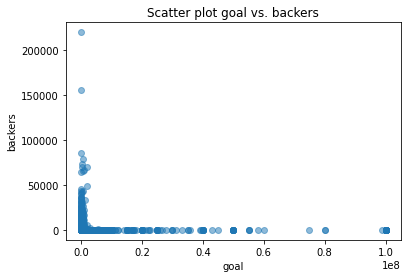

In [20]:
plt.scatter(kickstarter['goal'], kickstarter['backers'], alpha=0.5)
plt.title('Scatter plot goal vs. backers')
plt.xlabel('goal')
plt.ylabel('backers')
plt.show()

In [21]:
corr = kickstarter.corr()
corr

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.000366,0.001940,0.002565,0.000422,0.001220,0.000488
goal,0.000366,1.000000,0.004796,0.000134,0.002243,0.001709,0.936802
pledged,0.001940,0.004796,1.000000,0.690055,0.804124,0.936643,0.001670
backers,0.002565,0.000134,0.690055,1.000000,0.637138,0.735122,0.000535
usd pledged,0.000422,0.002243,0.804124,0.637138,1.000000,0.868505,0.002640
usd_pledged_real,0.001220,0.001709,0.936643,0.735122,0.868505,1.000000,0.002051
usd_goal_real,0.000488,0.936802,0.001670,0.000535,0.002640,0.002051,1.000000


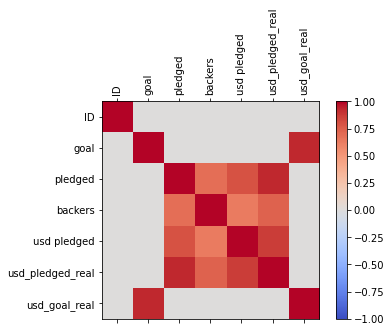

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

From the above section we can say that goal, pledged and backers are the three attributes that are most highly correlated. 